Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-08 15:43:30--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-08 15:43:30--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-08 15:43:31 (51.5 MB/s) - ‘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [5]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')

Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [6]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [7]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



In [ ]:
La normalización es importante antes de aplicar K-means porque este algoritmo se basa en distancias, y si las variables tienen escalas diferentes, las de mayor rango influirán más en los resultados. Normalizar consiste en escalar los datos para que todas las variables tengan la misma importancia, generalmente ajustándolas para que tengan media 0 y desviación estándar 1. Esto asegura que el clustering sea más preciso y equilibrado.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


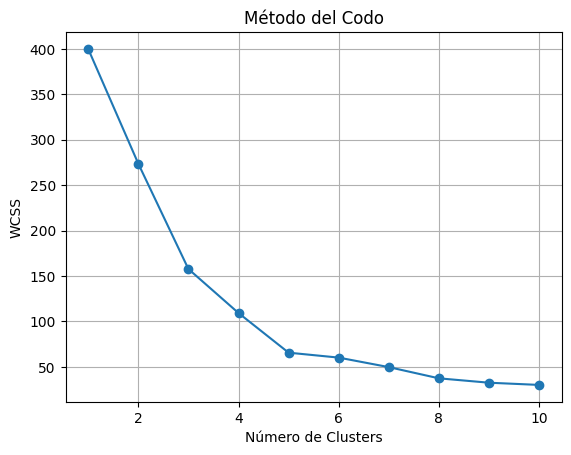

In [8]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

In [ ]:
El codo suele formarse en el cluster número 5, por lo que se considera que usar 5 clusters es una elección apropiada para segmentar a los clientes de manera efectiva.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
print(data[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                  15                      39        4
1           2                  15                      81        2
2           3                  16                       6        4
3           4                  16                      77        2
4           5                  17                      40        4


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

In [ ]:
Los resultados muestran que los clientes se agrupan en cinco clusters según sus ingresos y nivel de gasto. Cada cluster representa un perfil diferente de comportamiento, como clientes con alto ingreso y bajo gasto o bajo ingreso y alto gasto. La distribución no es uniforme, lo que indica que algunos perfiles son más comunes que otros dentro del conjunto de datos.

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [10]:
cluster_analysis = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_analysis)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



In [ ]:
Cluster 1: Jóvenes con bajo ingreso y bajo gasto.

Cluster 2: Adultos jóvenes con ingreso moderado y gasto medio.

Cluster 3: Adultos mayores con alto ingreso pero bajo gasto.

Cluster 4: Jóvenes adultos con ingreso bajo pero alto gasto.

Cluster 5: Adultos con alto ingreso y alto gasto.

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

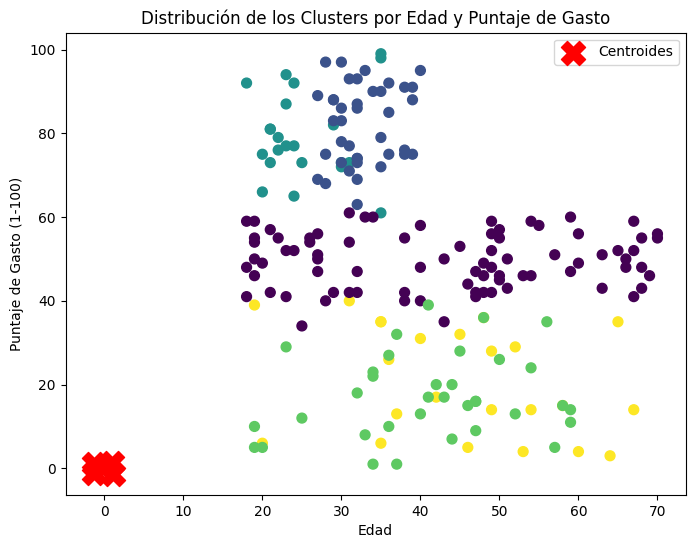

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', s=50)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.title('Distribución de los Clusters por Edad y Puntaje de Gasto')
plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend()
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

In [ ]:
La gráfica muestra una clara separación entre los clusters, con pocos solapamientos. Los clientes están agrupados según su edad y puntaje de gasto, lo que sugiere que el algoritmo K-means ha segmentado bien los datos. Los centroides están bien posicionados, reflejando las características promedio de cada grupo.


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [ ]:
Cluster 1: "Jóvenes de bajo ingreso y bajo gasto"
Jóvenes con bajos ingresos y bajo puntaje de gasto.

Cluster 2: "Adultos jóvenes con ingresos moderados y gasto medio"
Jóvenes adultos con ingresos moderados y gasto intermedio.

Cluster 3: "Adultos mayores con alto ingreso pero bajo gasto"
Adultos mayores con altos ingresos pero bajo gasto.

Cluster 4: "Jóvenes adultos con bajo ingreso pero alto gasto"
Jóvenes adultos con bajo ingreso pero alto puntaje de gasto.

Cluster 5: "Adultos con alto ingreso y alto poder adquisitivo"
Adultos con alto ingreso y alto puntaje de gasto.